# Remote Working Survey

By: Heba Masarwa, Nadine Halabi, Ibraheem Abo Ata

## Table Of Contents: 
- [Introduction](#introduction)
- [Data Exploration](#data-exploration)
- [Data Cleaning](#data-cleaning)
    - [Converting Percentage Strings to Floats](#converting-percentage-strings-to-floats)
    - [Addressing Null Values](#addressing-null-values)
    - [Addressing Outliers](#addressing-outliers)
    - [Visualizing the Outliers](#visualizing-the-outliers)
- [Visualizations](#visualizations)
    - [Correlation](#correlation)
    - [Gender Percentage in the Data](#gender-percentage-in-the-data)
    - [Age Distribution](#age-distribution)
    - [Industry Distribution](#industry-distribution)
    - [Occupation Distribution](#occupation-distribution)
    - [Organisation Size Distribution](#organisation-size-distribution)
- [Extracting Frequencies of Best and Worst Aspects for Tableau Visualization](#extracting-frequencies-of-best-and-worst-aspects-for-tableau-visualization)
- [Extracting Frequencies of the Top and Least Barriers for Tableau Visualization](#extracting-frequencies-of-the-top-and-least-barriers-for-tableau-visualization)
- [Exporting the Data](#exporting-the-data)

<a id="Introduction"></a>
## Introduction

Survey results of 1,500 remote workers from the Australian state of New South Wales, taken in August-September 2020 and March-April 2021, which aimed to capture the shift in remote work experiences and attitudes during different stages of the COVID-19 pandemic and gain insights on its long term implications.

source: https://mavenanalytics.io/data-playground?search=remote%20working%20survey

In our EDA, we aim to analyze data to help companies and individuals across various occupations improve their remote work practices. We'll look at the challenges of remote work, see how various factors influence productivity, and review the best and worst aspects of remote work, as well as preferences for remote work schedules. 

<a id="Data-Exploration "></a>
## Data Exploration 

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sidetable

<a id="Opening-the-Data"></a>
### Opening the Data

In [122]:
try:
    data = pd.read_csv('2020_rws.csv', encoding='ISO-8859-1')
except:
    print('Error while loading the file')

In [123]:
# Uncomment to Set pandas to display all columns
#pd.set_option('display.max_columns', None)

data.head(10)

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,...,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,Managing my personal commitments,My opportunities to socialise,Preparing for work and commuting,My working relationships,Managing my personal commitments,The number of hours I work,My job satisfaction,The number of hours I work,Managing my personal commitments,My opportunities to socialise
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Preparing for work

In [124]:
data.tail()

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,...,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction
1502,1503,1995,Male,"Rental, Hiring and Real Estate Services",Rental and Hiring Services (except Real Estate),Technicians and trades,"Engineering, ICT and Science Technicians",Between 20 and 199,NaN,Single person,...,My mental wellbeing,Preparing for work and commuting,Managing my family responsibilities,My personal relationships,My opportunities to socialise,My work-life balance,My job satisfaction,My personal relationships,My opportunities to socialise,My mental wellbeing
1503,1504,1990,Female,Wholesale Trade,"Grocery, Liquor and Tobacco Product Wholesaling",Managers,"Chief Executives, General Managers and Legisla...",Between 20 and 199,NaN,Couple 

Show data size

In [125]:
data.shape

(1507, 73)

Column names

In [126]:
data.columns

Index(['Response ID', 'What year were you born?', 'What is your gender?',
       'Which of the following best describes your industry?',
       'Which of the following best describes your industry? (Detailed)',
       'Which of the following best describes your current occupation?',
       'Which of the following best describes your current occupation? (Detailed)',
       'How many people are currently employed by your organisation?',
       'Do you manage people as part of your current occupation?',
       'Which of the following best describes your household?',
       'How long have you been in your current job?', 'Metro / Regional',
       'Thinking about your current job, how much of your time did you spend remote working last year?',
       'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely',
       'Thinking about remote working last year, how strongly do you agree or 

Since the column names are too long, we'll shorten them to make working with the data easier.

To streamline the dataset and focus on the most relevant information, we are removing a few columns that won't be utilized in the analysis.

In [127]:
data.drop(columns=['Which of the following best describes your industry? (Detailed)',
                 'Which of the following best describes your current occupation? (Detailed)'
                 ], inplace=True)


### Streamlining Column Names for Easier Data Management

In [128]:
colNamesList = data.columns.to_list()

In [129]:
data.rename(columns={colNamesList[0]: 'ID',
                    colNamesList[1] : 'Age' ,  #will be changed to age 
                    colNamesList[2] : 'Gender',
                    colNamesList[3] : 'Industry',
                    colNamesList[4] : 'Occupation',
                    colNamesList[5] : 'Organisation',
                    colNamesList[6] : 'ManagerStatus', # yes or no if they manage workers
                    colNamesList[7] : 'Household', 
                    colNamesList[8] : 'JobDuration',
                    colNamesList[9] : 'LocationType', 
                    colNamesList[10] : 'RemoteWorkRatio', # will be changed to a % 
                    colNamesList[11] : 'OrgRemoteSupport', # agree or disagree 
                    colNamesList[12] : 'RemotePreparedness',  # agree or disagree 
                    colNamesList[13] : 'RemoteWorkCommonality',  # agree or disagree 
                    colNamesList[14] : 'RemotePermissionEase',  # agree or disagree  
                    colNamesList[15] : 'RemoteCollabEase',  # agree or disagree  
                    colNamesList[16] : 'RemoteWorkRecommendation',  # agree or disagree  
                    colNamesList[17] : 'PreferredRemoteRatio', # will be changed to a % 
                    colNamesList[18] : 'RecentRemoteWorkShare', 
                    colNamesList[19] : 'OrgRemoteEncouragement', # agree or disagree 
                    colNamesList[20] : 'OrgRemotePreparedness', # agree or disagree 
                    colNamesList[21] : 'OrgRemoteCommonality', # agree or disagree
                    colNamesList[22] : 'OrgRemoteCollabEase',# agree or disagree
                    colNamesList[23] : 'RemoteCollaborationEase', # agree or disagree
                    colNamesList[24] : 'RecommendRemoteWork', # agree or disagree
                    colNamesList[25] : 'PreferredRemoteTime', # will be changed to a % 
                    colNamesList[26] : 'PostCOVIDRemotePref', # will be changed to a % 
                    colNamesList[27] : 'EmployerPostCOVIDRemoteEncouragement', # agree or disagree
                    colNamesList[28] : 'EmployerRemoteSupportPostCOVID', # agree or disagree
                    colNamesList[29] : 'PostCOVIDRemoteChoice', # agree or disagree
                    colNamesList[30] : 'RemoteVsOnsiteProductivity', # will be changed to a %, 
                                                                     #where the base productivity is 100%
                    colNamesList[31] : 'WorkplacePrepCommuteTime', # amount of hours 0.0 format 
                    colNamesList[32] :  "HoursSpentWorkingOnsite", # amount of hours 0.0 format  
                    colNamesList[33] :  'WorkdayPersonalFamilyHours', # amount of hours 0.0 format 
                    colNamesList[34] :  "WorkdayCaringDomesticHours", # amount of hours 0.0 format 
                    colNamesList[35] :  'RemoteWorkPrepCommuteHours', # amount of hours 0.0 format
                    colNamesList[36] :  'RemoteWorkingHours', # amount of hours 0.0 format
                    colNamesList[37] :  "RemoteWorkPersonalFamilyHours", # amount of hours 0.0 format
                    colNamesList[38] :  "RemoteWorkCaringDomesticHours", # amount of hours 0.0 format
                    colNamesList[39] :  "TopRemoteWorkBarrier1",
                    colNamesList[40] :  'LeastRemoteWorkBarrier1',
                    colNamesList[41] :  "TopRemoteWorkBarrier2",
                    colNamesList[42] :  'LeastRemoteWorkBarrier2',
                    colNamesList[43] :  "TopRemoteWorkBarrier3",
                    colNamesList[44] :  'LeastRemoteWorkBarrier3',
                    colNamesList[45] :  "TopRemoteWorkBarrier4",
                    colNamesList[46] :  'LeastRemoteWorkBarrier4',
                    colNamesList[47] :  "TopRemoteWorkBarrier5",
                    colNamesList[48] :  'LeastRemoteWorkBarrier5',
                    colNamesList[49] :  "TopRemoteWorkBarrier6",
                    colNamesList[50] :  'LeastRemoteWorkBarrier6',
                    colNamesList[51] :  "TopRemoteWorkBarrier7",
                    colNamesList[52] :  'LeastRemoteWorkBarrier7',   
                    colNamesList[53] :  "TopRemoteWorkBarrier8",
                    colNamesList[54] :  'LeastRemoteWorkBarrier8', 
                    colNamesList[55] :  "TopRemoteWorkBarrier9",
                    colNamesList[56] :  'LeastRemoteWorkBarrier9',
                    colNamesList[57] :  "TopRemoteWorkBarrier10",
                    colNamesList[58] :  'LeastRemoteWorkBarrier10',
                    colNamesList[59] :  'BestAspectRemoteWork1',
                    colNamesList[60] :  'WorstAspectRemoteWork1',
                    colNamesList[61] :  'BestAspectRemoteWork2',
                    colNamesList[62] :  'WorstAspectRemoteWork2',
                    colNamesList[63] :  'BestAspectRemoteWork3',                    
                    colNamesList[64] :  'WorstAspectRemoteWork3',
                    colNamesList[65] :  'BestAspectRemoteWork4',
                    colNamesList[66] :  'WortAspectRemoteWork4',
                    colNamesList[67] :  'BestAspectRemoteWork5',
                    colNamesList[68] :  'WorstAspectRemoteWork5',
                    colNamesList[69] :  'BestAspectRemoteWork6',
                    colNamesList[70] :  'WorstAspectRemoteWork6',  
                     }, inplace=True)


In [130]:
print(colNamesList[15])

Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely


Note: to find the original col name, print the index written. 

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 71 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    1507 non-null   int64  
 1   Age                                   1507 non-null   int64  
 2   Gender                                1507 non-null   object 
 3   Industry                              1507 non-null   object 
 4   Occupation                            1507 non-null   object 
 5   Organisation                          1507 non-null   object 
 6   ManagerStatus                         1371 non-null   object 
 7   Household                             1507 non-null   object 
 8   JobDuration                           1507 non-null   object 
 9   LocationType                          1507 non-null   object 
 10  RemoteWorkRatio                       1507 non-null   object 
 11  OrgRemoteSupport 

As we can see we have a large dataset with 70 columns and roughly 1507 rows, and most of the data is object type, this is before the cleaning and changing a few of the columns to intger (the % columns)

Checking for NULL values

In [132]:
data.stb.missing(style=True)

,missing,total,percent
RemoteWorkCommonality,250,"1,507",16.59%
OrgRemoteSupport,250,"1,507",16.59%
RemoteWorkRecommendation,250,"1,507",16.59%
RemoteCollabEase,250,"1,507",16.59%
RemotePermissionEase,250,"1,507",16.59%
RemotePreparedness,250,"1,507",16.59%
PostCOVIDRemotePref,136,"1,507",9.02%
ManagerStatus,136,"1,507",9.02%
OrgRemoteCommonality,31,"1,507",2.06%
RecommendRemoteWork,31,"1,507",2.06%


We have a few columns with a high % of NULL values, we will handle them case by case in the data cleaning section 

Checking for duplicated values

In [133]:
#  the count of duplicate rows
data.duplicated().sum()

0

<a id="Data-Cleaning"></a>
## Data Cleaning 

In the survey we had the year they were born in, we converted to age according to the year the survey was done in which is 2020

In [134]:
data['Age']= 2024 - data['Age']
data['Age']

0       52
1       52
2       42
3       37
4       33
        ..
1502    29
1503    34
1504    26
1505    56
1506    44
Name: Age, Length: 1507, dtype: int64

<a id="Converting-Percentage"></a>
### - Converting Percentage Strings to Floats

The following cols: RemoteWorkRatio, PreferredRemoteRatio, PreferredRemoteTime, PostCOVIDRemotePref  will be cleaned from a string with a '%' sign to a float number

In [135]:
data['RemoteWorkRatio'].unique()

array(['Rarely or never ', '20%', '60%', 'Less than 10% of my time',
       '80%', '100% - I spent all of my time remote working', '40%',
       '50% - I spent about half of my time remote working', '30%', '10%',
       '90%', '70%'], dtype=object)

In [136]:
data['PreferredRemoteRatio'].unique()

array(['I would not have preferred to work remotely ', '20%',
       '50% - About half of my time', '60%', '40%', '70%', '90%',
       'Less than 10% of my time', '100% - All of my time', '30%', '80%',
       '10%'], dtype=object)

In [137]:
data['PreferredRemoteTime'].unique()

array(['80%', '20%', '60%', '100% - All of my time',
       '50% - About half of my time', '70%',
       'I would not have preferred to work remotely ', '40%', '30%',
       'Less than 10% of my time', '10%', '90%'], dtype=object)

In [138]:
data['PostCOVIDRemotePref'].unique() 

array(['90%', '20%', '60%', '100% - All of my time',
       '50% - About half of my time', '80%',
       'I would prefer not to work remotely ', '70%', '40%',
       'Less than 10% of my time', '30%', '10%', nan], dtype=object)

In [139]:
def rowReplacemnt(colName,row1,row2,row3,row4):
    # row1 is replaced to 0
    # row2 is replaced to 50
    # row3 is replaced to 10
    # row4 is replaced to 100
    data[colName]= data[colName].replace(row1, 0)
    data[colName]= data[colName].replace(row2, 50)
    data[colName]= data[colName].replace(row3, 10)
    data[colName]= data[colName].replace(row4, 100)
    data[colName]= data[colName].astype(str).str.replace('%', '').astype(float)
    data[colName] = data[colName]/100
    return data[colName]

In [140]:
rowReplacemnt('RemoteWorkRatio',
              'Rarely or never ', 
              '50% - I spent about half of my time remote working',
              'Less than 10% of my time',
              '100% - I spent all of my time remote working')

0       0.0
1       0.2
2       0.6
3       0.2
4       0.1
       ... 
1502    0.1
1503    0.1
1504    0.5
1505    0.2
1506    0.1
Name: RemoteWorkRatio, Length: 1507, dtype: float64

In [141]:
rowReplacemnt('PreferredRemoteRatio',
              'I would not have preferred to work remotely ',
              '50% - About half of my time',
              'Less than 10% of my time',
              '100% - All of my time')

0       0.0
1       0.2
2       0.5
3       0.5
4       0.6
       ... 
1502    0.2
1503    0.1
1504    0.5
1505    0.6
1506    1.0
Name: PreferredRemoteRatio, Length: 1507, dtype: float64

In [142]:
rowReplacemnt('PreferredRemoteTime',
              'I would not have preferred to work remotely ',
              '50% - About half of my time',
              'Less than 10% of my time',
              '100% - All of my time')

0       0.8
1       0.2
2       0.6
3       1.0
4       1.0
       ... 
1502    0.4
1503    0.3
1504    0.2
1505    0.8
1506    1.0
Name: PreferredRemoteTime, Length: 1507, dtype: float64

In [143]:
rowReplacemnt('PostCOVIDRemotePref',
              'I would prefer not to work remotely ',
              '50% - About half of my time',
              'Less than 10% of my time',
              '100% - All of my time')

0       0.9
1       0.2
2       0.6
3       1.0
4       0.6
       ... 
1502    NaN
1503    NaN
1504    NaN
1505    NaN
1506    NaN
Name: PostCOVIDRemotePref, Length: 1507, dtype: float64

PostCOVIDRemotePref has NAN values (9%) and we will change them to the mean value 

In [144]:
mean_value = data['PostCOVIDRemotePref'].mean()

# Replace NaN values in the column with the median
data['PostCOVIDRemotePref'].fillna(mean_value, inplace=True)

'RemoteVsOnsiteProductivity' will be changed to a float value, where the base productivity is 100% if the answer is MORE it will be added to the base if it is LESS it will be subtracted from it 

In [145]:
data['RemoteVsOnsiteProductivity'].unique()

array(['I\x92m 50% more productive when working remotely (or more)',
       'I\x92m 20% less productive when working remotely',
       'I\x92m 10% less productive when working remotely',
       'My productivity is about same when I work remotely',
       'I\x92m 20% more productive when working remotely',
       'I\x92m 30% less productive when working remotely',
       'I\x92m 30% more productive when working remotely',
       'I\x92m 10% more productive when working remotely',
       'I\x92m 40% more productive when working remotely',
       'I\x92m 40% less productive when working remotely',
       'I\x92m 50% less productive when working remotely (or less)'],
      dtype=object)

In [146]:
def convert_to_numerical(prod_desc):
    if 'same' in prod_desc:
        return 100
    else:
        # Extract the percentage and direction (more/less) from the string
        match = re.search(r'(\d+)% (more|less)', prod_desc)
        if match:
            percentage, direction = match.groups()
            percentage = int(percentage)
            if direction == 'more':
                return 100 + percentage
            elif direction == 'less':
                return 100 - percentage
        return np.nan  # Return NaN for unmatched patterns

In [147]:
data['RemoteVsOnsiteProductivity']= data['RemoteVsOnsiteProductivity'].apply(convert_to_numerical)
data['RemoteVsOnsiteProductivity'] = data['RemoteVsOnsiteProductivity']/100
data['RemoteVsOnsiteProductivity']

0       1.5
1       0.8
2       0.9
3       1.0
4       1.2
       ... 
1502    1.3
1503    0.9
1504    1.5
1505    1.4
1506    1.3
Name: RemoteVsOnsiteProductivity, Length: 1507, dtype: float64

<a id="Addressing-Null"></a>
### - Addressing Null Values


Due to having a large percentage of null values in these categorical columns, we opted to change all NaN values to 'Response Not Available' to make it easier to filter or address later on in the analysis.

In [148]:
def fillNaN(colName):
    data[colName].fillna('Response Not Available', inplace=True)

In [149]:
fillNaN('RemoteWorkCommonality')
fillNaN('OrgRemoteSupport')
fillNaN('RemoteWorkRecommendation')
fillNaN('RemoteCollabEase')
fillNaN('RemotePermissionEase')
fillNaN('RemotePreparedness')
fillNaN('OrgRemoteCommonality')
fillNaN('RecommendRemoteWork')
fillNaN('RemoteCollaborationEase')
fillNaN('OrgRemoteCollabEase')
fillNaN('OrgRemotePreparedness')
fillNaN('OrgRemoteEncouragement')
fillNaN('ManagerStatus')

<a id="Addressing-Outliers"></a>
### - Addressing Outliers

The columns identified as having outliers include: 'Age', 'WorkplacePrepCommuteTime', 'HoursSpentWorkingOnsite', 'WorkdayPersonalFamilyHours', 'WorkdayCaringDomesticHours', 'RemoteWorkPrepCommuteHours', 'RemoteWorkingHours', 'RemoteWorkPersonalFamilyHours', and 'RemoteWorkCaringDomesticHours'. 

These columns represent the amount of time spent in various activities within a single day. However, some responses contain abnormally high numbers that are unrealistic. To address this issue, we will employ the Interquartile Range (IQR) method to detect these outliers. Once identified, we will replace them with the column's mean value, ensuring the data accurately reflects typical daily time expenditures.

<a id="Visualizing-the-Outlier"></a>
#### - Visualizing the Outliers

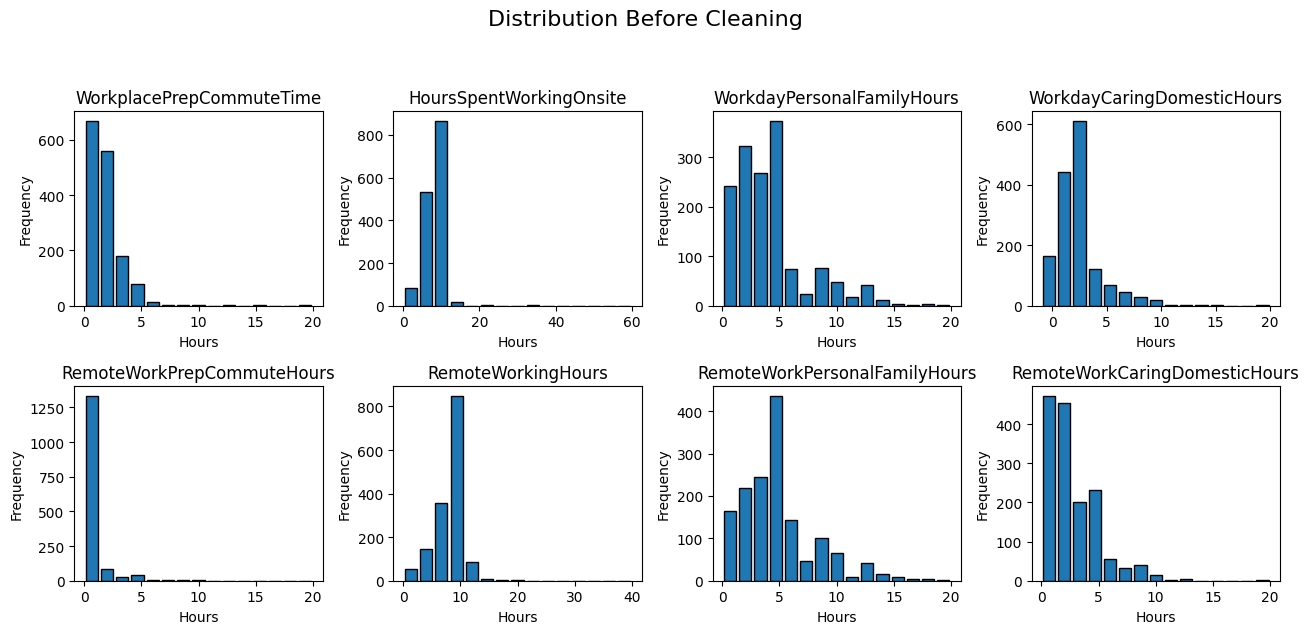

In [150]:
fig, axs = plt.subplots(2, 4,figsize=(13, 6))

col_titles = ['WorkplacePrepCommuteTime', 'HoursSpentWorkingOnsite', 
              'WorkdayPersonalFamilyHours', 'WorkdayCaringDomesticHours', 
              'RemoteWorkPrepCommuteHours', 'RemoteWorkingHours', 
              'RemoteWorkPersonalFamilyHours', 'RemoteWorkCaringDomesticHours']

for i, ax in enumerate(axs.flat):
    ax.hist(data[col_titles[i]], bins=15, edgecolor='black', rwidth=0.8)
    ax.set_title(col_titles[i])
    ax.set_xlabel('Hours')  
    ax.set_ylabel('Frequency')
    
fig.suptitle('Distribution Before Cleaning', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


Given that the survey inquires about different activities on a day when attending the employer's workplace or on a day when working remotly, any reported values exceeding 20 hours are likely to be illogical or incorrect inputs.

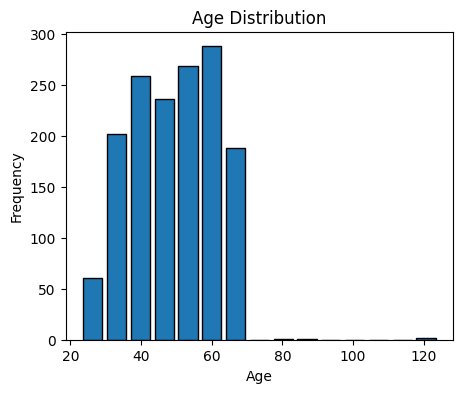

In [151]:
# outliers in the Age col:
fig, axs = plt.subplots(figsize=(5,4))

axs.hist(data['Age'], bins=15, edgecolor='black',rwidth=0.8) 

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

The age value recorded as 120 is regarded as an outlier or an incorrect input. 

In [152]:
def find_outliers_iqr(data,lower_para ,upper_para):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * lower_para)
    upper_bound = quartile_3 + (iqr * upper_para)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    outliers =  set(outliers)
    return outliers

In [153]:
def change_outliers(outliers,colName):
    data[colName]= data[colName].apply(lambda x: x if x not in outliers else np.nan)
    data[colName].fillna(round(data[colName].mean(),1), inplace=True)

In [154]:
change_outliers(find_outliers_iqr(data['Age'] ,1.5, 1.5),'Age' )
change_outliers(find_outliers_iqr(data['WorkplacePrepCommuteTime'] ,1.5, 3),'WorkplacePrepCommuteTime' )
change_outliers(find_outliers_iqr(data['HoursSpentWorkingOnsite'] , 5,6),'HoursSpentWorkingOnsite' )
change_outliers(find_outliers_iqr(data['WorkdayPersonalFamilyHours'] , 1.5,1.5),'WorkdayPersonalFamilyHours' )
change_outliers(find_outliers_iqr(data['WorkdayCaringDomesticHours'] , 1.5,2.5),'WorkdayCaringDomesticHours' )
change_outliers(find_outliers_iqr(data['RemoteWorkPrepCommuteHours'] , 2.5,3),'RemoteWorkPrepCommuteHours' )
change_outliers(find_outliers_iqr(data['RemoteWorkingHours'] ,4,3),'RemoteWorkingHours' )
change_outliers(find_outliers_iqr(data['RemoteWorkPersonalFamilyHours'] ,1.6,2.5),'RemoteWorkPersonalFamilyHours' )
change_outliers(find_outliers_iqr(data['RemoteWorkCaringDomesticHours'] ,1.6,2),'RemoteWorkCaringDomesticHours' )

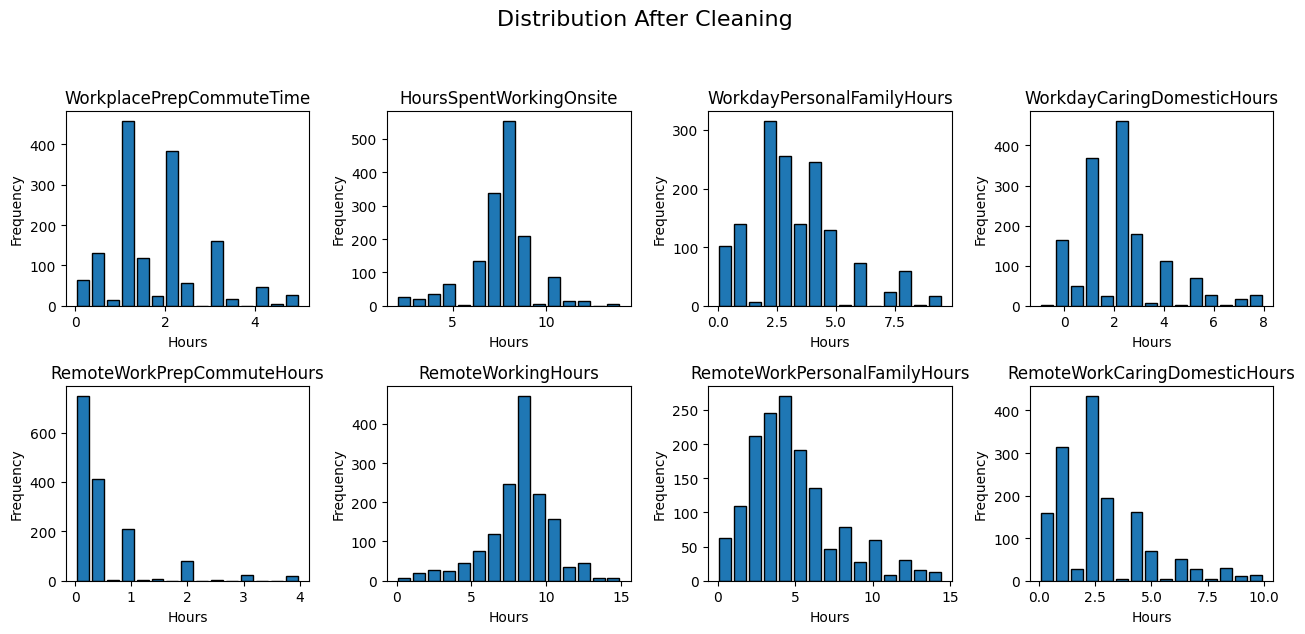

In [155]:
fig, axs = plt.subplots(2, 4,figsize=(13, 6))

col_titles = ['WorkplacePrepCommuteTime', 'HoursSpentWorkingOnsite', 
              'WorkdayPersonalFamilyHours', 'WorkdayCaringDomesticHours', 
              'RemoteWorkPrepCommuteHours', 'RemoteWorkingHours', 
              'RemoteWorkPersonalFamilyHours', 'RemoteWorkCaringDomesticHours']

for i, ax in enumerate(axs.flat):
    ax.hist(data[col_titles[i]], bins=15, edgecolor='black', rwidth=0.8)
    ax.set_title(col_titles[i])
    ax.set_xlabel('Hours')  
    ax.set_ylabel('Frequency')
    
fig.suptitle('Distribution After Cleaning', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

<a id="Visualizations"></a>
## Visualizations

<a id="Correlation"></a>
### - Correlation

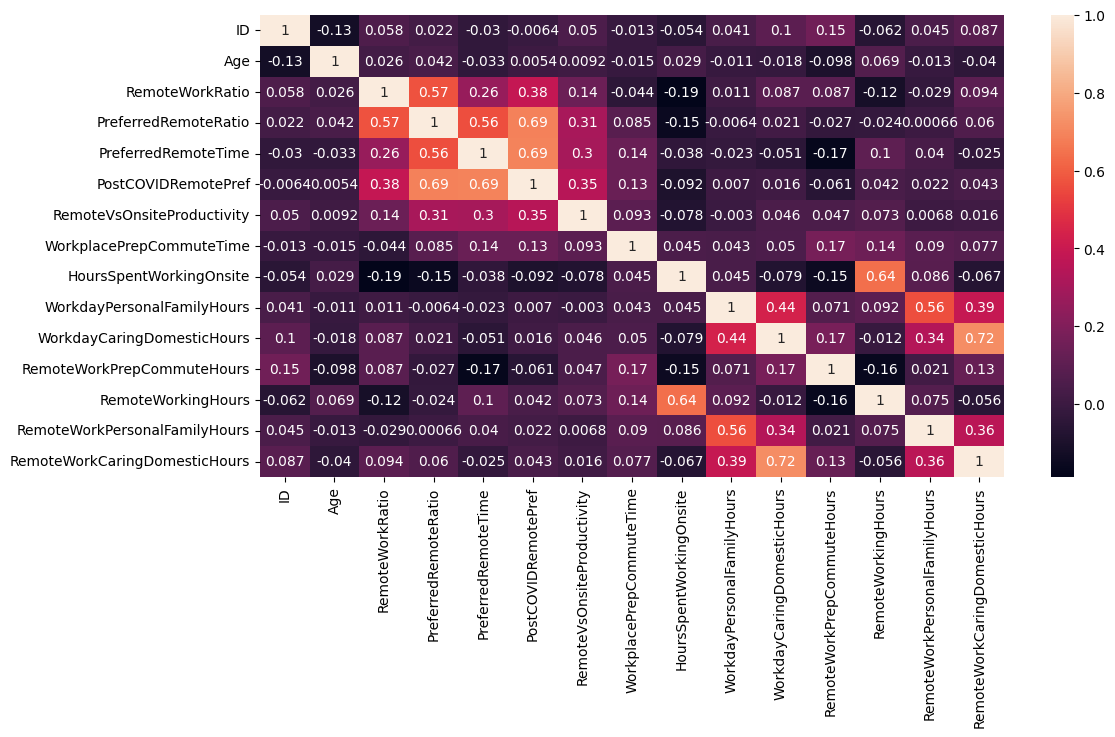

In [156]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Now, you can safely compute correlation and use seaborn's heatmap
plt.figure(figsize=(12,6))
sns.heatmap(numeric_data.corr(), cbar=True, annot=True)
plt.show()

The analysis reveals positive correlations between work and remote settings across various aspects, suggesting that increases in workday activities, including domestic care, personal and family time, and working hours, are mirrored in remote work scenarios. Specifically, strong positive relationships are found in domestic care hours and post-COVID remote work performance with preferred remote work ratios, indicating that preferences for remote work are closely aligned with actual remote work practices and perceived performance improvements. However, a slight negative correlation between on-site working hours and the remote work ratio suggests a minor decrease in remote work preference as on-site work hours increase. Overall, the data suggests a general preference for and effectiveness of remote work, aligning with individual preferences and post-COVID performance perceptions.

<a id="Gender-Percentage"></a>
### - Gender Percentage in the Data

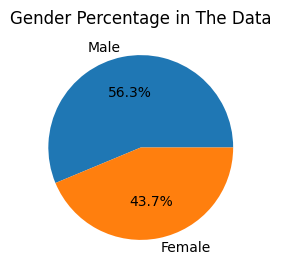

In [157]:
data = data[data['Gender'] != 'Rather not say']
gender_counts = data['Gender'].value_counts()
# Defining a Dataframe for the data
gender_counts = pd.DataFrame({'Gender': gender_counts.index, 
                              'Count': gender_counts.values})

# Calculating Percentage
gender_counts['Percentage'] = (gender_counts['Count'] / gender_counts['Count'].sum() * 100).round(2)

# formatted percentage strings with '%' sign
gender_counts['FormattedPercentage'] = gender_counts['Percentage'].apply(lambda x: f"{x:0.2f}%")
fig, ax = plt.subplots(figsize=(4, 3))
ax.set_title('Gender Percentage in The Data')

ax.pie(gender_counts['Percentage'] , labels=gender_counts['Gender'] ,autopct='%1.1f%%')
plt.show()

<a id="Age-Distribution"></a>
### - Age Distribution

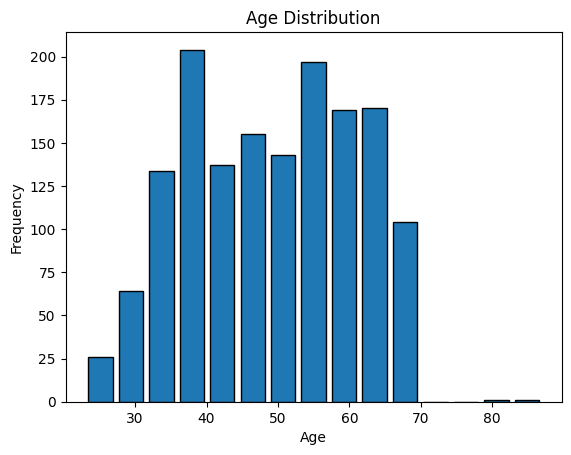

In [158]:

fig, axs = plt.subplots()

axs.hist(data['Age'], bins=15, edgecolor='black',rwidth=0.8) 

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

<a id="Industry-Distribution"></a>
### - Industry Distribution

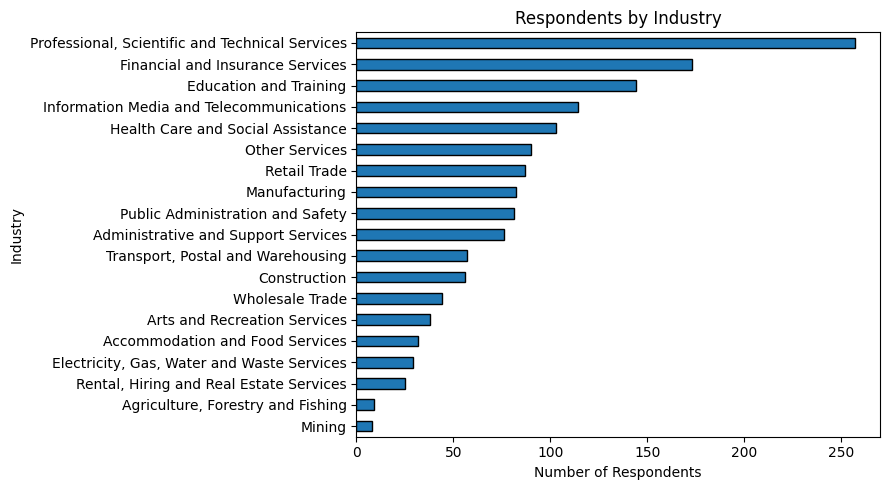

In [159]:
industry_counts = data['Industry'].value_counts().sort_values(ascending=True)

# Creating a horozantal bar chart
plt.figure(figsize=(9, 5)) 
industry_counts.plot(kind='barh', edgecolor='black')
plt.title('Respondents by Industry')
plt.ylabel('Industry')
plt.xlabel('Number of Respondents')
plt.tight_layout() 
plt.show()

<a id="Occupation-Distribution"></a>
### - Occupation Distribution

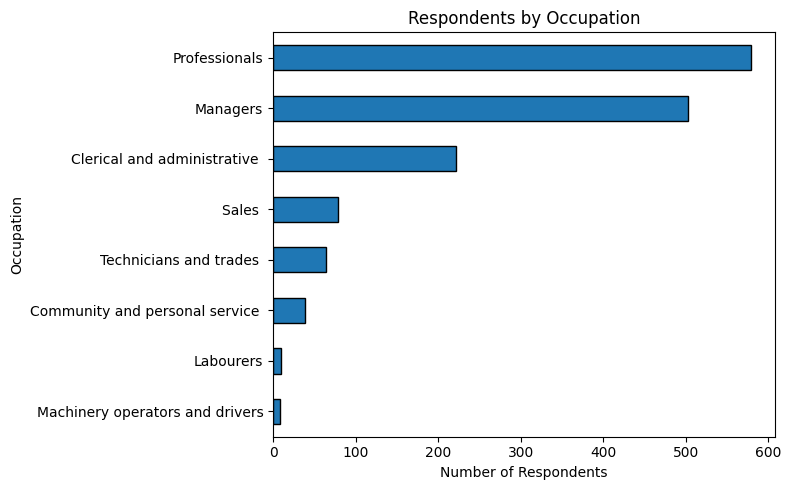

In [160]:
Occupation_counts = data['Occupation'].value_counts().sort_values(ascending=True)

# Creating a horozantal bar chart
plt.figure(figsize=(8, 5)) 
Occupation_counts.plot(kind='barh', edgecolor='black')
plt.title('Respondents by Occupation')
plt.ylabel('Occupation')
plt.xlabel('Number of Respondents')
plt.tight_layout() 
plt.show()

<a id="Household-Distribution"></a>
### - Household Distribution

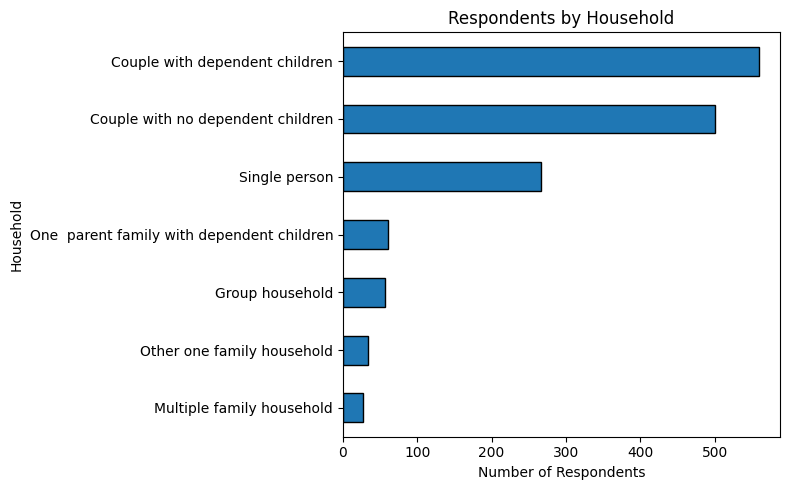

In [161]:
Household_counts = data['Household'].value_counts().sort_values(ascending=True)

# Creating a horozantal bar chart
plt.figure(figsize=(8,5)) 
Household_counts.plot(kind='barh', edgecolor='black')
plt.title('Respondents by Household')
plt.ylabel('Household')
plt.xlabel('Number of Respondents')
plt.tight_layout() 
plt.show()

<a id="Organisation-Distribution"></a>
### - Organisation Size Distribution

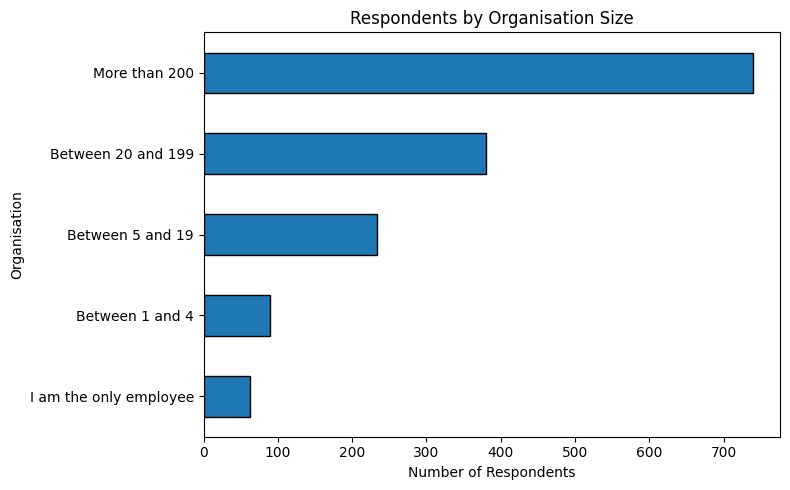

In [162]:
Organisation_counts = data['Organisation'].value_counts().sort_values(ascending=True)

# Creating a horozantal bar chart
plt.figure(figsize=(8,5)) 
Organisation_counts.plot(kind='barh', edgecolor='black')
plt.title('Respondents by Organisation Size')
plt.ylabel('Organisation')
plt.xlabel('Number of Respondents')
plt.tight_layout() 
plt.show()

<a id="data1"></a>
### Extracting Frequencies of Best and Worst Aspects for Tableau Visualization

In [163]:
# getting the freq for each aspect

bestAspectName= ['BestAspectRemoteWork1','BestAspectRemoteWork2','BestAspectRemoteWork3',
                 'BestAspectRemoteWork4','BestAspectRemoteWork5','BestAspectRemoteWork6']
worstAspectName= ['WorstAspectRemoteWork1','WorstAspectRemoteWork2','WorstAspectRemoteWork3',
                  'WortAspectRemoteWork4','WorstAspectRemoteWork5','WorstAspectRemoteWork6']
appendedColBest = pd.concat([data[column] for column in bestAspectName]).reset_index(drop=True)
bestCount = appendedColBest.value_counts().rename_axis('BestAspect').to_frame('counts')
appendedColWorst = pd.concat([data[column] for column in worstAspectName]).reset_index(drop=True)
worstCount = appendedColWorst.value_counts().rename_axis('WorstAspect').to_frame('counts')

<a id="data2"></a>
### Extracting Frequencies of the Top and Least Barriers for Tableau Visualization

In [165]:
topBarrierName= ['TopRemoteWorkBarrier1','TopRemoteWorkBarrier2','TopRemoteWorkBarrier3',
                 'TopRemoteWorkBarrier4','TopRemoteWorkBarrier5','TopRemoteWorkBarrier6',
                 'TopRemoteWorkBarrier7','TopRemoteWorkBarrier8','TopRemoteWorkBarrier9',
                 'TopRemoteWorkBarrier10']
leastBarrierName= ['LeastRemoteWorkBarrier1','LeastRemoteWorkBarrier2','LeastRemoteWorkBarrier3',
                 'LeastRemoteWorkBarrier4','LeastRemoteWorkBarrier5','LeastRemoteWorkBarrier6',
                 'LeastRemoteWorkBarrier7','LeastRemoteWorkBarrier8','LeastRemoteWorkBarrier9',
                 'LeastRemoteWorkBarrier10']
appendedColBest = pd.concat([data[column] for column in topBarrierName]).reset_index(drop=True)
topCount = appendedColBest.value_counts().rename_axis('TopBarrier').to_frame('counts')
appendedColWorst = pd.concat([data[column] for column in leastBarrierName]).reset_index(drop=True)
leastCount = appendedColWorst.value_counts().rename_axis('LeastBarrier').to_frame('counts')

In [182]:
# Melting the DataFrame to stack the barrier columns
melted_data = data.melt(id_vars=['Organisation'], value_vars=topBarrierName, var_name='BarrierType', value_name='Barrier')

# Dropping any rows where Barrier is NaN or empty (if this cleanup is needed)
melted_data = melted_data.dropna(subset=['Barrier'])

# Grouping by Organisation and Barrier, then counting occurrences
topBarrierCounts = melted_data.groupby(['Organisation', 'Barrier']).size().reset_index(name='counts')

# Melting the DataFrame to stack the barrier columns
melted_data = data.melt(id_vars=['Organisation'], value_vars=leastBarrierName, var_name='BarrierType', value_name='Barrier')

# Dropping any rows where Barrier is NaN or empty (if this cleanup is needed)
melted_data = melted_data.dropna(subset=['Barrier'])

# Grouping by Organisation and Barrier, then counting occurrences
leastBarrierCounts = melted_data.groupby(['Organisation', 'Barrier']).size().reset_index(name='counts')


## Exporting the data

In [184]:
with pd.ExcelWriter('data.xlsx', engine='xlsxwriter') as writer:
    data.to_excel(writer, sheet_name='cleaned_data')
    bestCount.to_excel(writer, sheet_name='bestAspects')
    worstCount.to_excel(writer, sheet_name='worstAspects')
    topCount.to_excel(writer, sheet_name='topBarrier')
    leastCount.to_excel(writer, sheet_name='leastBarrier')
    topBarrierCounts.to_excel(writer, sheet_name='topBarrierCountsPerOrg')
    leastBarrierCounts.to_excel(writer, sheet_name='leastBarrierCountsPerOrg')